# New book chapter 1 solutions


## Computer exercises

1.1 : 4. Estimating the Value of e

The limit  

$$
e = \lim_{n \to \infty} \left(1 + \frac{1}{n} \right)^n
$$

defines the number e in calculus. Estimate e by taking the value of this expression for  

$$
n = 8, 8^2, 8^3, \dots, 8^{10}
$$

Then, compute the **absolute error** and **relative error** for each value, comparing them with the true value of e.
Compare  with  e  obtained  from  e  <-  exp(1.0).  Interpret  
the  results. 

In [1]:
import numpy as np

n_values = [8**i for i in range(1, 11)]
e_estimations = [(1 + 1/n)**n for n in n_values]
for n, e_est in zip(n_values, e_estimations):
    print(f"n = {n}, (1 + 1/n)^n = {e_est:.6f}")

n = 8, (1 + 1/n)^n = 2.565785
n = 64, (1 + 1/n)^n = 2.697345
n = 512, (1 + 1/n)^n = 2.715632
n = 4096, (1 + 1/n)^n = 2.717950
n = 32768, (1 + 1/n)^n = 2.718240
n = 262144, (1 + 1/n)^n = 2.718277
n = 2097152, (1 + 1/n)^n = 2.718281
n = 16777216, (1 + 1/n)^n = 2.718282
n = 134217728, (1 + 1/n)^n = 2.718282
n = 1073741824, (1 + 1/n)^n = 2.718282


In [3]:
true_e = np.e
print(f"\nTrue e value: {true_e:.6f}\n")

absolute_errors = [abs(est - true_e) for est in e_estimations]
relative_errors = [abs(est - true_e) / true_e for est in e_estimations]

print(f"{'n':<15}{'Absolute Error':<20}{'Relative Error':<20}")
print("="*55)
for n, abs_err, rel_err in zip(n_values, absolute_errors, relative_errors):
    print(f"{n:<15}{abs_err:<20.10f}{rel_err:<20.10f}")



True e value: 2.718282

n              Absolute Error      Relative Error      
8              0.1524973145        0.0561006268        
64             0.0209368759        0.0077022462        
512            0.0026498283        0.0009748174        
4096           0.0003317473        0.0001220430        
32768          0.0000414765        0.0000152584        
262144         0.0000051847        0.0000019073        
2097152        0.0000006481        0.0000002384        
16777216       0.0000000810        0.0000000298        
134217728      0.0000000101        0.0000000037        
1073741824     0.0000000013        0.0000000005        


1.2 : 2.
Use a computer algebra system to obtain graphs of the first five partial sums of the series:

$$
\arctan x = \sum_{k=1}^{\infty} (-1)^{k+1} \frac{x^{2k-1}}{2k-1}
$$

Plot these partial sums along with the actual function $\arctan(x)$ for comparison.


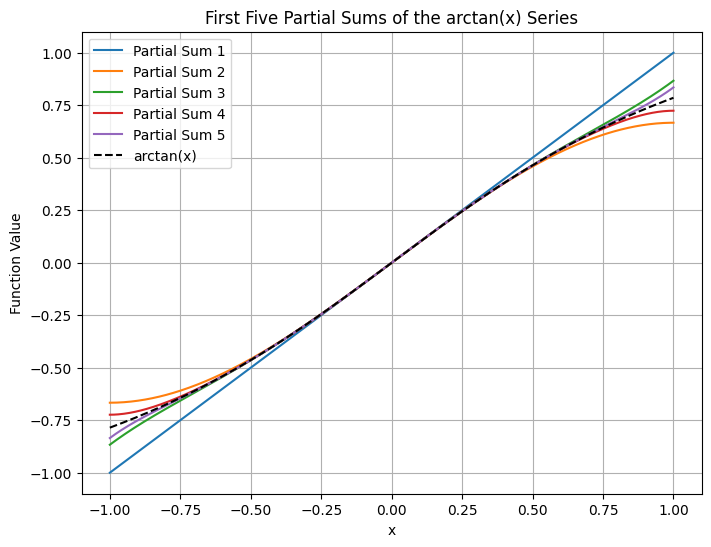

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def arctan_series_partial_sum(x, n_terms):
    """Compute the nth partial sum of the arctan(x) series."""
    return sum((-1)**(k+1) * x**(2*k-1) / (2*k-1) for k in range(1, n_terms+1))

x_vals = np.linspace(-1, 1, 400)

partial_sums = [np.array([arctan_series_partial_sum(x, n) for x in x_vals]) for n in range(1, 6)]

true_arctan = np.arctan(x_vals)

plt.figure(figsize=(8, 6))
for i, partial_sum in enumerate(partial_sums):
    plt.plot(x_vals, partial_sum, label=f'Partial Sum {i+1}')
plt.plot(x_vals, true_arctan, 'k--', label='arctan(x)')

plt.xlabel("x")
plt.ylabel("Function Value")
plt.title("First Five Partial Sums of the arctan(x) Series")
plt.legend()
plt.grid()
plt.show()


1.3: 4.  Write  a  program  to  determine  the  machine  epsilon  
within  a  factor  of 2 for  single,  double,  and  long-double  
precision. 

In [7]:
import numpy as np

def machine_epsilon(dtype):
    """Determine machine epsilon for a given floating-point type."""
    eps = dtype(1)
    while dtype(1) + eps != dtype(1):
        eps /= dtype(2)
    return eps * dtype(2)  # Multiply by 2 to stay within a factor of 2

epsilon_single = machine_epsilon(np.float32)
epsilon_double = machine_epsilon(np.float64)
epsilon_long_double = machine_epsilon(np.longdouble)  # Use np.longdouble instead

print(f"Machine epsilon for single precision (float32): {epsilon_single}")
print(f"Machine epsilon for double precision (float64): {epsilon_double}")
print(f"Machine epsilon for long double precision (longdouble): {epsilon_long_double}")


Machine epsilon for single precision (float32): 1.1920928955078125e-07
Machine epsilon for double precision (float64): 2.220446049250313e-16
Machine epsilon for long double precision (longdouble): 2.220446049250313e-16


1.4: 23. On your computer,  show that in single precision,  you have  
only six decimal  digits of accuracy  if you  enter  20 digits.  
Show  that going to double  precision  is effective  only if all  
work  is done  in double  precision.  For example,  if you  use pi  =  3.14 or pi  =  22/7,  you will  lose all the precision  
that you  have  gained  by using double  precision.  Remember that the number of significant  digits in the final  results  
is what  counts! 

In [9]:
import numpy as np

# Define single-precision (float32) and double-precision (float64) representations
pi_single = np.float32("3.14159265358979323846")  # Entering 20 digits
pi_double = np.float64("3.14159265358979323846")

# Printing single vs. double precision
print("Single precision (float32):", pi_single)
print("Double precision (float64):", pi_double)

# Loss of precision due to low-precision pi values
pi_approx_1 = np.float64(3.14)  # Low precision pi
pi_approx_2 = np.float64(22 / 7)  # Another approximation

# Compute the difference from high-precision pi
true_pi = np.pi
error_1 = np.abs(true_pi - pi_approx_1)
error_2 = np.abs(true_pi - pi_approx_2)

# Display results
print("\nEffect of using low-precision pi values in double precision:")
print(f"pi = 3.14   -> Absolute error: {error_1:.15f}")
print(f"pi = 22/7   -> Absolute error: {error_2:.15f}")
print(f"True pi (double precision) -> {true_pi:.15f}")


Single precision (float32): 3.1415927
Double precision (float64): 3.141592653589793

Effect of using low-precision pi values in double precision:
pi = 3.14   -> Absolute error: 0.001592653589793
pi = 22/7   -> Absolute error: 0.001264489267350
True pi (double precision) -> 3.141592653589793
